In [1]:
import os, sys, argparse
from upsetplot import from_memberships
from upsetplot import plot
%matplotlib inline 
from matplotlib import pyplot
import numpy as np

def parse_maf(fp):
    ''' Return a dictionary with vars[patient][variant_set]'''
    caller_vars = {}

    fh = open(fp, 'r')
    for line in fh:
        temp = line.strip().split('\t')
        if line[0] == '#' or temp[0] == 'Hugo_Symbol':
            continue
        ID = temp[16] + '_' + temp[17] # 'tumor'_'normal'
        if ID not in caller_vars:
            caller_vars[ID] = set()
        chrom =temp[4]
        s_pos = temp[5]
        e_pos = temp[6]
        ref = temp[11]
        tum_allele_1 = temp[12]
        tum_allele_2 = temp[13]
        gene = temp[47]
        impact = temp[93]
        var = (chrom, s_pos, e_pos, ref, tum_allele_1, tum_allele_2, gene, impact)
        caller_vars[ID].add(var)

    return(caller_vars)
# main
possible_callers = ('mutect', 'muse', 'somaticsniper', 'varscan')
#not all possible cancers, just for testing
possible_cancers = ('ACC', 'BLCA','BRCA','CESC','CHOL','COAD','DLBC','ESCA','GBM','HNSC', 
					'KICH','KIRC','KIRP','LAML','LGG','LIHC','LUAD','LUSC','MESO')
original = os.getcwd()
#print(original)
# saving contents of intersections 
# 1,2,3,4 = muse, mutect, somaticsniper, varscan feed in arguments as such 




In [2]:
def four_set_contents(dat_1, dat_2, dat_3, dat_4):
    data = dict({'muse':[],'mutect':[],'somaticsniper':[], 'varscan':[],
                              'muse+mutect':[], 'muse+somaticsniper':[], 'muse+varscan':[],
                              'mutect+somaticsniper':[], 'mutect+varscan':[], 'somaticsniper+varscan':[],
                              'muse+mutect+somaticsniper':[], 'muse+mutect+varscan':[], 
                              'muse+somaticsniper+varscan':[], 'mutect+somaticsniper+varscan':[], 
                              'muse+mutect+somaticsniper+varscan':[]})
    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys())) & set(list(dat_4.keys()))
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        set_4 = dat_4[patient]
                
        inter = set_1 & set_2 & set_3 & set_4
        interlist = data['muse+mutect+somaticsniper+varscan']#.extend(inter)
        interlist.extend(inter)
        interlist = list(dict.fromkeys(interlist))
        data['muse+mutect+somaticsniper+varscan']= interlist
        
        inter_123 = (set_1 & set_2 & set_3) - inter
        inter123list = data['muse+mutect+somaticsniper']#.extend(inter_123)
        inter123list.extend(inter_123)
        inter123list = list(dict.fromkeys(inter123list))
        data['muse+mutect+somaticsniper']= inter123list 
        
        inter_124 = (set_1 & set_2 & set_4) - inter
        inter124list = data['muse+mutect+varscan']#.extend(inter_124)
        inter124list.extend(inter_124)
        inter124list = list(dict.fromkeys(inter124list))
        data['muse+mutect+varscan']= inter124list
        
        inter_134 = (set_1 & set_3 & set_4) - inter
        inter134list = data['muse+somaticsniper+varscan']#.extend(inter_134)
        inter134list.extend(inter_134)
        inter134list = list(dict.fromkeys(inter134list))
        data['muse+somaticsniper+varscan']= inter134list
        
        inter_234 = (set_2 & set_3 & set_4) - inter
        inter234list = data['mutect+somaticsniper+varscan']#.extend(inter_234)
        inter234list.extend(inter_234)
        inter234list = list(dict.fromkeys(inter234list))
        data['mutect+somaticsniper+varscan']= inter234list 
        
        
        
        inter_12 = (set_1 & set_2) - inter - inter_123 - inter_124
        inter12list = data['muse+mutect']#.extend(inter_12)
        inter12list.extend(inter_12)
        inter12list = list(dict.fromkeys(inter12list))
        data['muse+mutect']= inter12list
        
        inter_13 = (set_1 & set_3) - inter - inter_123 - inter_134
        inter13list = data['muse+somaticsniper']#.extend(inter_13)
        inter13list.extend(inter_13)
        inter13list = list(dict.fromkeys(inter13list))
        data['muse+somaticsniper']= inter13list
        
        inter_14 = (set_1 & set_4) - inter - inter_124 - inter_134
        inter14list = data['muse+varscan']#.extend(inter_14)
        inter14list.extend(inter_14)
        inter14list = list(dict.fromkeys(inter14list))
        data['muse+varscan']= inter14list
        
        inter_23 = (set_2 & set_3) - inter - inter_123 - inter_234
        inter23list = data['mutect+somaticsniper']#.extend(inter_23)
        inter23list.extend(inter_23)
        inter23list = list(dict.fromkeys(inter23list))
        data['mutect+somaticsniper']= inter23list
        
        inter_24 = (set_2 & set_4) - inter - inter_124 - inter_234
        inter24list = data['mutect+varscan']#.extend(inter_24)
        inter24list.extend(inter_24)
        inter24list = list(dict.fromkeys(inter24list))
        data['mutect+varscan']= inter24list
        
        inter_34 = (set_3 & set_4) - inter - inter_234 - inter_134
        inter34list = data['somaticsniper+varscan']#.extend(inter_34)
        inter34list.extend(inter_34)
        inter34list = list(dict.fromkeys(inter34list))
        data['somaticsniper+varscan']=inter34list
        
        
        diff_1 = (set_1) - inter - inter_13 - inter_12 - inter_14 - inter_123 - inter_134 - inter_124
        diff1list = data['muse']#.extend(diff_1)
        diff1list.extend(diff_1)
        diff1list = list(dict.fromkeys(diff1list))
        data['muse']= diff1list
        
        diff_2 = (set_2) - inter - inter_12 - inter_23 - inter_24 - inter_123 - inter_124 - inter_234
        diff2list = data['mutect']#.extend(diff_1)
        diff2list.extend(diff_2)
        diff2list = list(dict.fromkeys(diff2list))
        data['mutect']= diff2list
        
        diff_3 = (set_3) - inter - inter_13 - inter_23 - inter_34 - inter_123 - inter_134 - inter_234
        diff3list = data['somaticsniper']#.extend(diff_3)
        diff3list.extend(diff_3)
        diff3list = list(dict.fromkeys(diff3list))
        data['somaticsniper']= diff3list 
        
        diff_4 = (set_4) - inter - inter_14 - inter_24 - inter_34 - inter_124 - inter_134 - inter_234
        diff4list = data['varscan']#.extend(diff_4)
        diff4list.extend(diff_4)
        diff4list = list(dict.fromkeys(diff4list))
        data['varscan']= diff4list
    
    return data

In [3]:
keys = ('muse','mutect','somaticsniper', 'varscan',
                              'muse+mutect', 'muse+somaticsniper', 'muse+varscan',
                              'mutect+somaticsniper', 'mutect+varscan', 'somaticsniper+varscan',
                              'muse+mutect+somaticsniper', 'muse+mutect+varscan', 
                              'muse+somaticsniper+varscan', 'mutect+somaticsniper+varscan', 
                              'muse+mutect+somaticsniper+varscan')
def how_many_high(cancer, all_variants):
    highcount = []
    for key in keys:
        count = 0
        content = four_set_contents(all_variants[possible_callers[1]], all_variants[possible_callers[0]],
                             all_variants[possible_callers[2]], all_variants[possible_callers[3]])
        for c in content[key]:
            if c[7] == 'HIGH':
                count += 1
        highcount.append(count)
            
    return highcount

#print(how_many_high('ACC'))

In [4]:
def two_set(dat_1, dat_2):
    inter_all = 0
    diff_1_all = 0
    diff_2_all = 0

    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys()))
    dat = []
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        inter = len(set_1 & set_2)
        diff_1 = len(set_1 - set_2)
        diff_2 = len(set_2 - set_1)

        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
    
    dat.extend([inter_all, diff_1_all, diff_2_all])
    return dat


In [5]:
def three_set(dat_1, dat_2, dat_3):

    inter_all = 0
    diff_1_all = 0
    diff_2_all = 0
    diff_3_all = 0
    inter_12_all = 0
    inter_13_all = 0
    inter_23_all = 0

    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys()))
    
    dat = []
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        inter = len(set_1 & set_2 & set_3)
        inter_12 = len(set_1 & set_2) - inter
        inter_13 = len(set_1 & set_3) - inter
        inter_23 = len(set_2 & set_3) - inter
        diff_1 = len(set_1) - inter - inter_13 - inter_12
        diff_2 = len(set_2) - inter - inter_12 - inter_23
        diff_3 = len(set_3) - inter - inter_13 - inter_23
        
        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
        diff_3_all = diff_3_all + diff_3
        inter_12_all = inter_12_all + inter_12
        inter_13_all = inter_13_all + inter_13
        inter_23_all = inter_23_all + inter_23

    dat.extend([inter_all, diff_1_all, diff_2_all, diff_3_all, inter_12_all, inter_13_all, inter_23_all])
    return dat


number of patients: 92
all: 74.53260869565217 60242.40111058602
mutect: 13.130434782608695 358.54820415879027
muse: 2.608695652173913 48.607750472589785
somaticsniper: 1.934782608695652 25.017485822306245
varscan: 11.532608695652174 1083.3576323251416
mutect+muse: 7.163043478260869 244.54950378071825
mutect+somaticsniper: 1.0217391304347827 7.695179584120986
mutect+varscan: 7.260869565217392 299.88846880907374
muse+somaticsniper: 0.532608695652174 2.270675803402646
muse+varscan: 1.4130434782608696 9.981568998109642
somaticsniper+varscan: 8.228260869565217 572.0674621928166
mutect+muse+somaticsniper: 4.967391304347826 335.053284499055
mutect+muse+varscan: 6.967391304347826 310.7489366729679
mutect+somaticsniper+varscan: 1.7717391304347827 31.958766540642728
muse+somaticsniper+varscan: 6.836956521739131 621.9625472589793
[240, 1208, 178, 1061, 659, 49, 130, 94, 668, 757, 457, 641, 629, 163, 6857]


<Figure size 432x288 with 0 Axes>

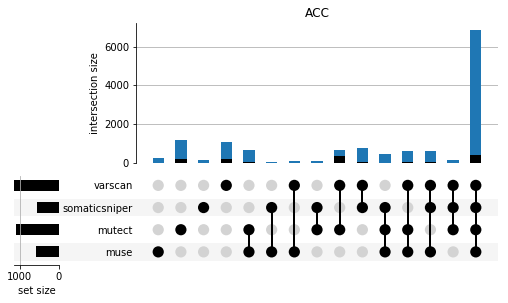

number of patients: 408
all: 198.2156862745098 80898.99269511725
mutect: 38.88970588235294 2664.2500901095736
muse: 10.823529411764707 157.8316032295271
somaticsniper: 1.5318627450980393 4.195063196847366
varscan: 6.811274509803922 63.2854611207228
mutect+muse: 21.612745098039216 837.8206218762015
mutect+somaticsniper: 2.8676470588235294 27.85503171856978
mutect+varscan: 16.323529411764707 259.57670126874274
muse+somaticsniper: 0.5122549019607843 0.7106341311034218
muse+varscan: 4.482843137254902 40.234999759707804
somaticsniper+varscan: 2.409313725490196 23.97216815647828
mutect+muse+somaticsniper: 4.737745098039215 46.762104719338716
mutect+muse+varscan: 40.13235294117647 3274.3256199538637
mutect+somaticsniper+varscan: 6.512254901960785 58.25965373894656
muse+somaticsniper+varscan: 11.411764705882353 351.64907727797
[4416, 15867, 625, 2779, 8818, 209, 1829, 1170, 6660, 983, 1933, 16374, 4656, 2657, 80872]


<Figure size 432x288 with 0 Axes>

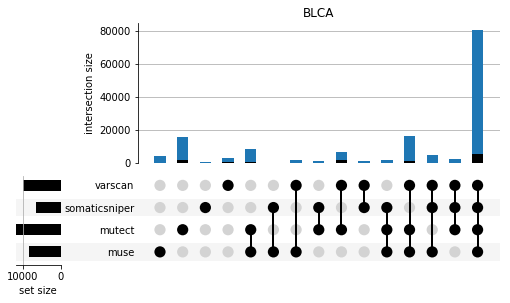

number of patients: 975
all: 58.550769230769234 31956.507935305726
mutect: 25.68 3482.2565743589744
muse: 3.562051282051282 101.8482009204471
somaticsniper: 0.7671794871794871 1.4832305062458908
varscan: 4.821538461538461 153.63174122287964
mutect+muse: 9.302564102564103 940.6089677843522
mutect+somaticsniper: 0.6564102564102564 1.948612754766601
mutect+varscan: 8.793846153846154 635.2795518737672
muse+somaticsniper: 0.19179487179487179 0.3396249835634451
muse+varscan: 1.1917948717948719 73.42680447074292
somaticsniper+varscan: 0.7815384615384615 3.4794540433925047
mutect+muse+somaticsniper: 1.082051282051282 6.143011176857331
mutect+muse+varscan: 17.275897435897434 8452.622342143326
mutect+somaticsniper+varscan: 2.4625641025641025 42.57680368178829
muse+somaticsniper+varscan: 2.0635897435897435 141.93236660092046
[3473, 25038, 748, 4701, 9070, 187, 1162, 640, 8574, 762, 1055, 16844, 2012, 2401, 57087]


<Figure size 432x288 with 0 Axes>

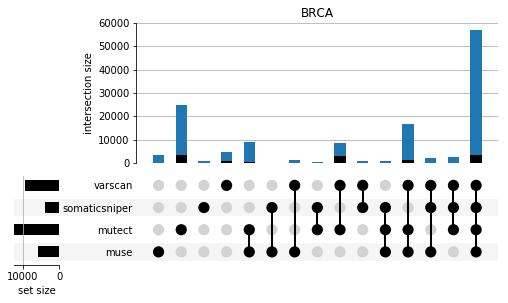

number of patients: 288
all: 242.03125 817754.6691623264
mutect: 41.791666666666664 14448.359374999998
muse: 9.850694444444445 1020.6061800733025
somaticsniper: 1.59375 6.289822048611111
varscan: 13.25 1357.4027777777778
mutect+muse: 15.909722222222221 2181.880738811729
mutect+somaticsniper: 2.576388888888889 31.653886959876544
mutect+varscan: 19.90972222222222 5731.359905478396
muse+somaticsniper: 0.4895833333333333 5.111002604166667
muse+varscan: 2.9375 97.99609375
somaticsniper+varscan: 2.451388888888889 123.18513695987654
mutect+muse+somaticsniper: 3.4409722222222223 40.56596016589506
mutect+muse+varscan: 24.729166666666668 2231.2530381944443
mutect+somaticsniper+varscan: 8.621527777777779 771.2630087770062
muse+somaticsniper+varscan: 14.184027777777779 14976.337661554791
[2837, 12036, 459, 3816, 4582, 141, 846, 742, 5734, 706, 991, 7122, 4085, 2483, 69705]


<Figure size 432x288 with 0 Axes>

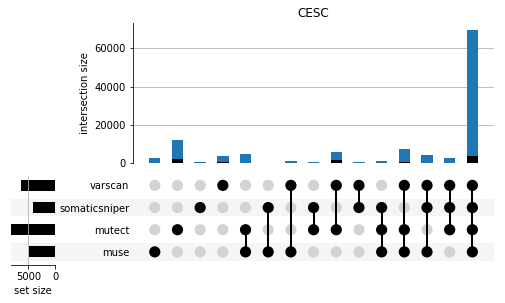

number of patients: 49
all: 59.51020408163265 20775.556018325697
mutect: 21.163265306122447 545.8100791336943
muse: 3.061224489795918 88.09829237817576
somaticsniper: 1.9387755102040816 3.1187005414410667
varscan: 15.326530612244898 1317.526030820491
mutect+muse: 4.020408163265306 60.9179508538109
mutect+somaticsniper: 1.3673469387755102 17.252811328613078
mutect+varscan: 14.693877551020408 2544.5797584339853
muse+somaticsniper: 0.22448979591836735 0.3373594335693461
muse+varscan: 1.2040816326530612 6.244064972927947
somaticsniper+varscan: 1.1020408163265305 5.969179508538111
mutect+muse+somaticsniper: 1.6326530612244898 10.885464389837567
mutect+muse+varscan: 6.612244897959184 140.35985006247395
mutect+somaticsniper+varscan: 3.020408163265306 28.305705955851728
muse+somaticsniper+varscan: 2.7142857142857144 87.75510204081633
[150, 1037, 95, 751, 197, 11, 59, 67, 720, 54, 80, 324, 133, 148, 2916]


<Figure size 432x288 with 0 Axes>

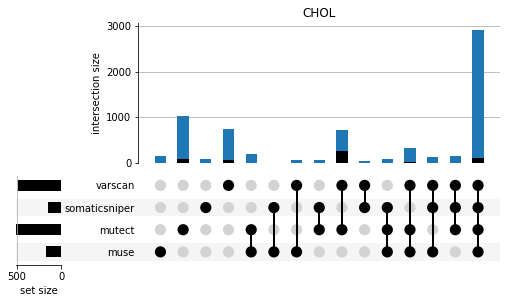

number of patients: 399
all: 367.16290726817044 739146.8230852821
mutect: 85.92481203007519 62320.11966005237
muse: 10.235588972431078 1022.9319665077481
somaticsniper: 2.508771929824561 14.701050872796024
varscan: 33.42606516290727 3640.9312504318445
mutect+muse: 34.59649122807018 8579.74946137273
mutect+somaticsniper: 2.3483709273182956 16.728261757149767
mutect+varscan: 83.6842105263158 30087.008046431867
muse+somaticsniper: 0.8521303258145363 5.5545756622131774
muse+varscan: 7.087719298245614 931.2930572044146
somaticsniper+varscan: 7.548872180451128 397.5959824372963
mutect+muse+somaticsniper: 4.451127819548872 49.505756873386474
mutect+muse+varscan: 75.3859649122807 67401.9412566504
mutect+somaticsniper+varscan: 10.070175438596491 534.1454513476673
muse+somaticsniper+varscan: 22.265664160401002 6149.022154383452
[4084, 34284, 1001, 13337, 13804, 340, 2828, 937, 33390, 3012, 1776, 30079, 8884, 4018, 146498]


<Figure size 432x288 with 0 Axes>

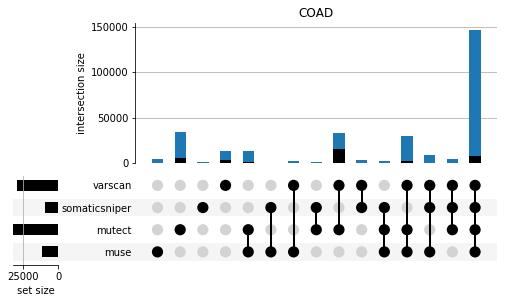

number of patients: 37
all: 109.05405405405405 6412.9700511322135
mutect: 21.135135135135137 281.08984660336006
muse: 12.486486486486486 103.16873630387146
somaticsniper: 1.0 1.6216216216216217
varscan: 10.243243243243244 59.373265157048955
mutect+muse: 8.972972972972974 36.67494521548575
mutect+somaticsniper: 0.8648648648648649 1.1439006574141712
mutect+varscan: 11.324324324324325 91.30021913805699
muse+somaticsniper: 0.918918918918919 3.3177501826150477
muse+varscan: 2.675675675675676 8.381300219138057
somaticsniper+varscan: 4.594594594594595 26.024835646457266
mutect+muse+somaticsniper: 2.189189189189189 12.802045288531776
mutect+muse+varscan: 16.16216216216216 342.8385682980277
mutect+somaticsniper+varscan: 3.4324324324324325 7.70489408327246
muse+somaticsniper+varscan: 12.243243243243244 145.1029948867787
[462, 782, 37, 379, 332, 34, 99, 32, 419, 170, 81, 598, 453, 127, 4035]


<Figure size 432x288 with 0 Axes>

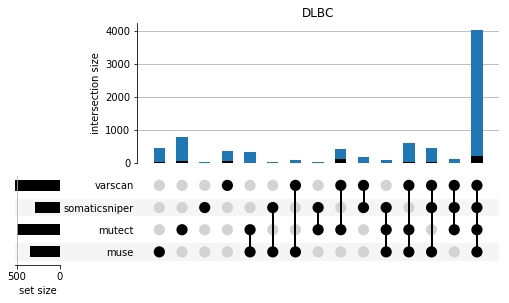

number of patients: 183
all: 138.66120218579235 23643.06554390994
mutect: 34.076502732240435 1912.5952402281348
muse: 4.983606557377049 25.469676610230216
somaticsniper: 1.9289617486338797 3.366538266296396
varscan: 18.737704918032787 3108.1388515631993
mutect+muse: 11.0 126.98360655737704
mutect+somaticsniper: 2.3060109289617485 14.594881901519901
mutect+varscan: 29.098360655737704 9667.77174594643
muse+somaticsniper: 0.3825136612021858 0.45477619516856277
muse+varscan: 2.7540983606557377 18.42587118158201
somaticsniper+varscan: 2.300546448087432 20.603660903580277
mutect+muse+somaticsniper: 3.8360655737704916 24.541431514825764
mutect+muse+varscan: 20.540983606557376 1071.822090835797
mutect+somaticsniper+varscan: 8.049180327868852 105.48938457403924
muse+somaticsniper+varscan: 4.770491803278689 99.18229866523336
[912, 6236, 353, 3429, 2013, 70, 504, 422, 5325, 421, 702, 3759, 873, 1473, 25375]


<Figure size 432x288 with 0 Axes>

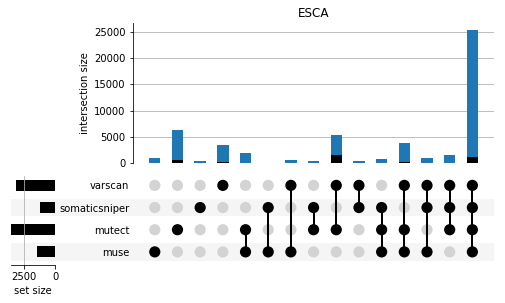

number of patients: 384
all: 91.3984375 377372.2917683919
mutect: 83.984375 74056.0049641927
muse: 3.8645833333333335 314.76291232638886
somaticsniper: 0.8151041666666666 6.025709364149306
varscan: 5.580729166666667 269.87369113498266
mutect+muse: 7.9453125 2105.5829467773438
mutect+somaticsniper: 0.8151041666666666 11.405917697482645
mutect+varscan: 6.7890625 902.4945678710938
muse+somaticsniper: 0.3098958333333333 1.0576104058159723
muse+varscan: 3.1302083333333335 1220.2330457899304
somaticsniper+varscan: 2.8125 106.80338541666667
mutect+muse+somaticsniper: 2.2552083333333335 107.17966037326386
mutect+muse+varscan: 19.34375 37456.058919270836
mutect+somaticsniper+varscan: 2.6614583333333335 95.28122287326387
muse+somaticsniper+varscan: 8.549479166666666 9966.179843478734
[1484, 32250, 313, 2143, 3051, 119, 1202, 313, 2607, 1080, 866, 7428, 3283, 1022, 35097]


<Figure size 432x288 with 0 Axes>

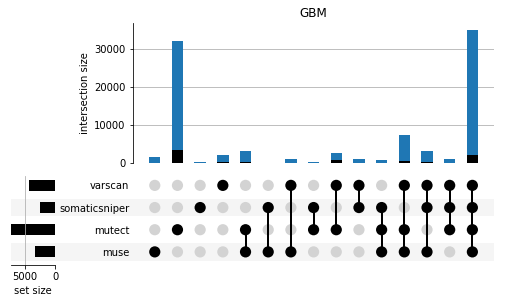

number of patients: 503
all: 114.2624254473161 39635.5454469999
mutect: 25.59045725646123 1935.0648791149722
muse: 4.594433399602385 32.41603263125027
somaticsniper: 0.709741550695825 1.4783742870806968
varscan: 4.337972166998012 61.28935334316171
mutect+muse: 12.14314115308151 354.31748277729247
mutect+somaticsniper: 0.8349900596421471 3.6049784790264368
mutect+varscan: 14.441351888667992 511.0775743155382
muse+somaticsniper: 0.3061630218687873 0.44304352809583847
muse+varscan: 2.250497017892644 12.585362576034845
somaticsniper+varscan: 1.1868787276341948 4.633068388871541
mutect+muse+somaticsniper: 1.9662027833001987 30.959096316731813
mutect+muse+varscan: 30.210735586481114 2069.4426680473816
mutect+somaticsniper+varscan: 3.737574552683897 23.27904540945184
muse+somaticsniper+varscan: 4.5168986083499005 119.92367069946125
[2311, 12872, 357, 2182, 6108, 154, 1132, 420, 7264, 597, 989, 15196, 2272, 1880, 57474]


<Figure size 432x288 with 0 Axes>

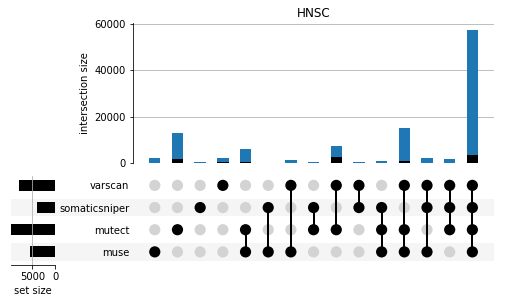

number of patients: 66
all: 22.803030303030305 5996.673324150598
mutect: 10.136363636363637 166.87534435261708
muse: 0.8181818181818182 4.694214876033058
somaticsniper: 0.8636363636363636 2.0571625344352618
varscan: 5.166666666666667 54.80555555555555
mutect+muse: 1.9393939393939394 26.269054178145097
mutect+somaticsniper: 0.4393939393939394 2.2766299357208446
mutect+varscan: 3.015151515151515 23.166437098255276
muse+somaticsniper: 0.13636363636363635 0.32988980716253447
muse+varscan: 0.6363636363636364 2.5950413223140503
somaticsniper+varscan: 1.606060606060606 34.17814508723599
mutect+muse+somaticsniper: 1.5454545454545454 28.914600550964185
mutect+muse+varscan: 3.1666666666666665 51.32070707070707
mutect+somaticsniper+varscan: 0.8333333333333334 10.169191919191922
muse+somaticsniper+varscan: 1.4242424242424243 12.638200183654726
[54, 669, 57, 341, 128, 9, 42, 29, 199, 106, 102, 209, 94, 55, 1505]


<Figure size 432x288 with 0 Axes>

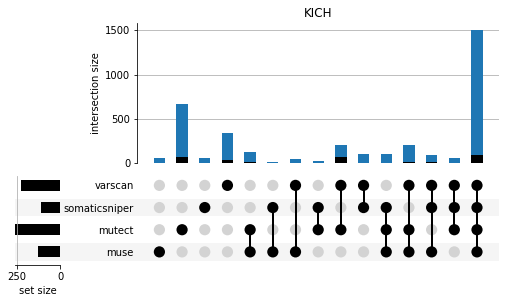

number of patients: 335
all: 38.474626865671645 1278.7389084428605
mutect: 15.794029850746268 12644.456083760306
muse: 1.6746268656716419 2.595624860770773
somaticsniper: 0.4208955223880597 0.5303096458008466
varscan: 2.925373134328358 12.194430830920025
mutect+muse: 4.573134328358209 14.429725996881267
mutect+somaticsniper: 0.2 0.2316417910447761
mutect+varscan: 8.719402985074627 77.99887725551348
muse+somaticsniper: 0.14925373134328357 0.14488750278458454
muse+varscan: 0.7373134328358208 0.9996524838494097
somaticsniper+varscan: 0.8597014925373134 1.5713611049231457
mutect+muse+somaticsniper: 0.4597014925373134 1.0782267765649365
mutect+muse+varscan: 10.408955223880596 97.51335263978613
mutect+somaticsniper+varscan: 0.9074626865671642 1.2242726665181554
muse+somaticsniper+varscan: 1.492537313432836 3.706660726219647
[561, 5291, 141, 980, 1532, 50, 247, 67, 2921, 288, 154, 3487, 500, 304, 12889]


<Figure size 432x288 with 0 Axes>

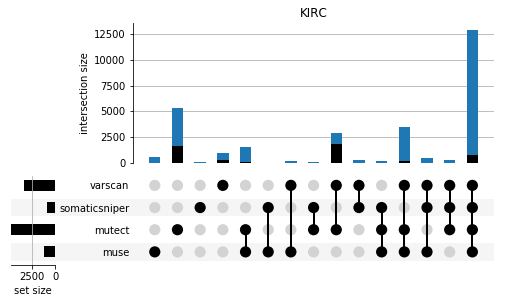

number of patients: 280
all: 56.260714285714286 940.0784566326532
mutect: 7.642857142857143 23.322448979591837
muse: 1.9892857142857143 3.7463137755102043
somaticsniper: 0.5714285714285714 0.666326530612245
varscan: 3.7714285714285714 8.797755102040817
mutect+muse: 3.592857142857143 9.469948979591836
mutect+somaticsniper: 0.5214285714285715 0.7495408163265307
mutect+varscan: 10.25 43.294642857142854
muse+somaticsniper: 0.16785714285714284 0.21825255102040816
muse+varscan: 0.6392857142857142 1.0805994897959184
somaticsniper+varscan: 1.5642857142857143 4.938724489795918
mutect+muse+somaticsniper: 0.9464285714285714 1.6507015306122448
mutect+muse+varscan: 4.360714285714286 43.57345663265305
mutect+somaticsniper+varscan: 1.1428571428571428 1.6224489795918366
muse+somaticsniper+varscan: 2.232142857142857 5.071109693877551
[557, 2140, 160, 1056, 1006, 47, 179, 146, 2870, 438, 265, 1221, 625, 320, 15753]


<Figure size 432x288 with 0 Axes>

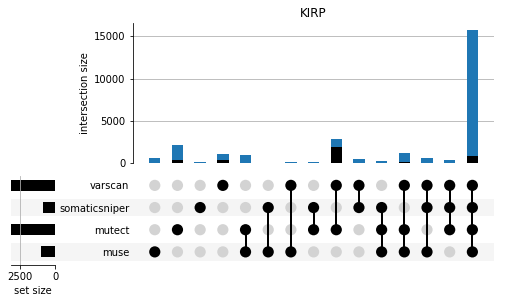

number of patients: 113
all: 10.097345132743364 517.114417730441
mutect: 50.39823008849557 40074.91220925679
muse: 2.327433628318584 88.94588456417887
somaticsniper: 2.663716814159292 17.74532069856684
varscan: 6.20353982300885 679.6842352572636
mutect+muse: 8.008849557522124 1011.884877437544
mutect+somaticsniper: 1.5044247787610618 7.5597149346072525
mutect+varscan: 5.292035398230088 479.8881666536143
muse+somaticsniper: 0.061946902654867256 0.09350771399483124
muse+varscan: 0.7433628318584071 14.456261257733576
somaticsniper+varscan: 2.327433628318584 76.30871642258595
mutect+muse+somaticsniper: 0.49557522123893805 2.356175111598402
mutect+muse+varscan: 5.495575221238938 494.0021928107134
mutect+somaticsniper+varscan: 4.743362831858407 74.17307541702561
muse+somaticsniper+varscan: 0.8938053097345132 11.192262510768266
[263, 5695, 301, 701, 905, 7, 84, 170, 598, 263, 56, 621, 101, 536, 1141]


<Figure size 432x288 with 0 Axes>

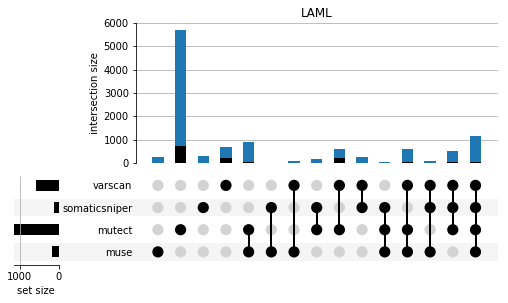

number of patients: 500
all: 41.53 177326.02509999997
mutect: 12.418 7109.391276
muse: 1.6 296.00399999999985
somaticsniper: 0.272 1.210016
varscan: 2.714 309.6962040000001
mutect+muse: 4.34 2358.7364
mutect+somaticsniper: 0.344 3.5296639999999995
mutect+varscan: 4.94 1154.2163999999993
muse+somaticsniper: 0.09 0.35390000000000016
muse+varscan: 0.812 69.392656
somaticsniper+varscan: 0.554 16.591084
mutect+muse+somaticsniper: 0.634 3.8800440000000007
mutect+muse+varscan: 5.706 2027.8675640000004
mutect+somaticsniper+varscan: 1.128 71.15561600000004
muse+somaticsniper+varscan: 3.47 3618.465099999999
[800, 6209, 136, 1357, 2170, 45, 406, 172, 2470, 277, 317, 2853, 1735, 564, 20765]


<Figure size 432x288 with 0 Axes>

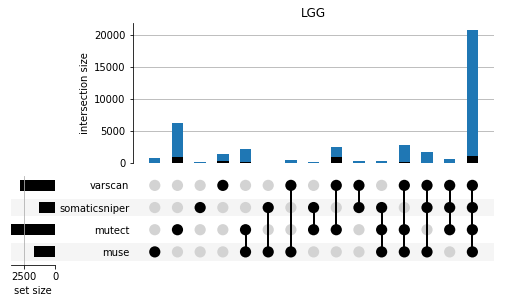

number of patients: 361
all: 99.85041551246537 14671.99978514591
mutect: 15.110803324099724 267.0458943685208
muse: 3.085872576177285 14.870742244150982
somaticsniper: 0.8310249307479224 1.3758795589352444
varscan: 6.6814404432132966 72.21707936556656
mutect+muse: 8.11634349030471 115.65405421996455
mutect+somaticsniper: 0.9944598337950139 8.132933295478088
mutect+varscan: 9.481994459833794 218.67072843210227
muse+somaticsniper: 0.2188365650969529 0.3039111117931876
muse+varscan: 1.3628808864265929 9.80460555090891
somaticsniper+varscan: 2.6038781163434903 32.0508436859754
mutect+muse+somaticsniper: 2.443213296398892 28.922675547302436
mutect+muse+varscan: 12.293628808864266 311.07721702565203
mutect+somaticsniper+varscan: 1.8476454293628808 4.5668157856370035
muse+somaticsniper+varscan: 3.662049861495845 50.71681463463294
[1114, 5455, 300, 2412, 2930, 79, 492, 359, 3423, 940, 882, 4438, 1322, 667, 36046]


<Figure size 432x288 with 0 Axes>

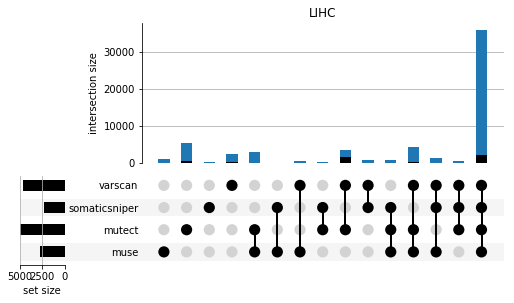

number of patients: 556
all: 194.60071942446044 55456.55999948242
mutect: 50.735611510791365 3525.1872929713786
muse: 8.172661870503598 83.89105118782672
somaticsniper: 1.8633093525179856 22.600020702862174
varscan: 9.143884892086332 508.7382899435847
mutect+muse: 26.888489208633093 1090.1674214585166
mutect+somaticsniper: 2.431654676258993 53.47914186636303
mutect+varscan: 25.35431654676259 743.5633087055536
muse+somaticsniper: 0.5305755395683454 1.087194632782982
muse+varscan: 4.570143884892087 65.29184242534029
somaticsniper+varscan: 5.33273381294964 325.22202202266965
mutect+muse+somaticsniper: 4.820143884892087 386.3777237203043
mutect+muse+varscan: 62.064748201438846 6164.697246519331
mutect+somaticsniper+varscan: 7.248201438848921 80.22616582992598
muse+somaticsniper+varscan: 7.7859712230215825 199.57109815744528
[4544, 28209, 1036, 5084, 14950, 295, 2541, 1352, 14097, 2965, 2680, 34508, 4329, 4030, 108198]


<Figure size 432x288 with 0 Axes>

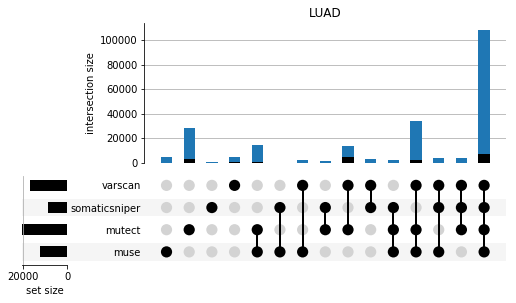

number of patients: 486
all: 222.12345679012347 53309.190519737844
mutect: 37.22839506172839 1229.513679317177
muse: 8.080246913580247 40.003848498704464
somaticsniper: 1.7592592592592593 4.4996570644718785
varscan: 9.823045267489713 180.63535368930886
mutect+muse: 22.36008230452675 456.8435917627733
mutect+somaticsniper: 2.5864197530864197 15.975041914342325
mutect+varscan: 22.366255144032923 475.24857321885213
muse+somaticsniper: 0.6604938271604939 1.0678631306203323
muse+varscan: 4.934156378600823 29.03270165455808
somaticsniper+varscan: 4.823045267489712 103.5530491625599
mutect+muse+somaticsniper: 5.847736625514403 184.12907923927585
mutect+muse+varscan: 53.224279835390945 3055.157517485479
mutect+somaticsniper+varscan: 6.744855967078189 67.57687683110636
muse+somaticsniper+varscan: 9.386831275720164 219.0602381073346
[3927, 18093, 855, 4774, 10867, 321, 2398, 1257, 10870, 2344, 2842, 25867, 4562, 3278, 107952]


<Figure size 432x288 with 0 Axes>

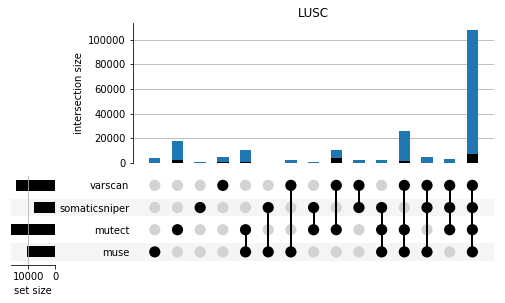

number of patients: 78
all: 28.346153846153847 996.0212031558187
mutect: 7.217948717948718 28.555062458908605
muse: 1.1923076923076923 1.7194280078895452
somaticsniper: 0.28205128205128205 0.3050624589086128
varscan: 2.141025641025641 29.30062458908612
mutect+muse: 2.076923076923077 2.1992110453648914
mutect+somaticsniper: 0.46153846153846156 1.6844181459566079
mutect+varscan: 3.8333333333333335 10.677350427350428
muse+somaticsniper: 0.10256410256410256 0.09204470742932279
muse+varscan: 0.6025641025641025 2.3420447074293227
somaticsniper+varscan: 0.5128205128205128 0.5575279421433268
mutect+muse+somaticsniper: 1.1153846153846154 18.717455621301774
mutect+muse+varscan: 4.987179487179487 23.11522024983564
mutect+somaticsniper+varscan: 0.7435897435897436 0.9086127547666007
muse+somaticsniper+varscan: 0.6666666666666666 1.4017094017094014
[93, 563, 22, 167, 162, 8, 47, 36, 299, 40, 87, 389, 52, 58, 2211]


<Figure size 432x288 with 0 Axes>

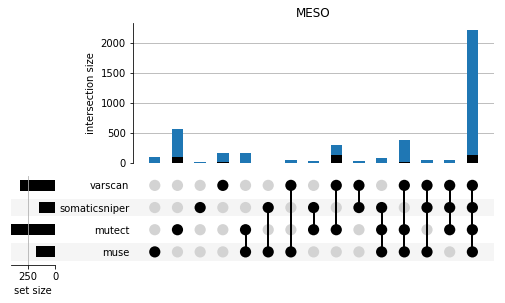

In [6]:
os.chdir(original)
# functions 48, 94

def four_set(dat_1, dat_2, dat_3, dat_4):
    dat = []
    inter_all = 0
    
    interall = []
    
    diff_1_all = 0
    diff_2_all = 0
    diff_3_all = 0
    diff_4_all = 0
    
    diff1all = []
    diff2all = []
    diff3all = []
    diff4all = []
    
    inter_12_all = 0
    inter_13_all = 0
    inter_14_all = 0
    inter_23_all = 0
    inter_24_all = 0
    inter_34_all = 0
    
    inter12all = []
    inter13all = []
    inter14all = []
    inter23all = []
    inter24all = []
    inter34all = []
    
    inter_123_all = 0
    inter_124_all = 0
    inter_134_all = 0
    inter_234_all = 0    
    
    inter123all = []
    inter124all = []
    inter134all = []
    inter234all = []
    
    set1_total = 0
    set2_total = 0
    set3_total = 0
    set4_total = 0
    
    # intersect patient keys
    patients = set(list(dat_1.keys())) & set(list(dat_2.keys())) & set(list(dat_3.keys())) & set(list(dat_4.keys()))
    total = 0
    for patient in patients:
        set_1 = dat_1[patient]
        set_2 = dat_2[patient]
        set_3 = dat_3[patient]
        set_4 = dat_4[patient]
        
        set1_total = set1_total + len(set_1)
        set2_total = set2_total + len(set_2)
        set3_total = set3_total + len(set_3)
        set4_total = set4_total + len(set_4)
        
        
        inter = len(set_1 & set_2 & set_3 & set_4)
        interall.append(inter)
        inter_123 = len(set_1 & set_2 & set_3) - inter
        inter123all.append(inter_123)
        inter_124 = len(set_1 & set_2 & set_4) - inter
        inter124all.append(inter_124)
        inter_134 = len(set_1 & set_3 & set_4) - inter
        inter134all.append(inter_134)
        inter_234 = len(set_2 & set_3 & set_4) - inter
        inter234all.append(inter_234)
        
        
        inter_12 = len(set_1 & set_2) - inter - inter_123 - inter_124
        inter12all.append(inter_12)
        inter_13 = len(set_1 & set_3) - inter - inter_123 - inter_134
        inter13all.append(inter_13)
        inter_14 = len(set_1 & set_4) - inter - inter_124 - inter_134
        inter14all.append(inter_14)
        inter_23 = len(set_2 & set_3) - inter - inter_123 - inter_234
        inter23all.append(inter_23)
        inter_24 = len(set_2 & set_4) - inter - inter_124 - inter_234
        inter24all.append(inter_24)
        inter_34 = len(set_3 & set_4) - inter - inter_234 - inter_134
        inter34all.append(inter_34)
        
        diff_1 = len(set_1) - inter - inter_13 - inter_12 - inter_14 - inter_123 - inter_134 - inter_124
        diff1all.append(diff_1)
        diff_2 = len(set_2) - inter - inter_12 - inter_23 - inter_24 - inter_123 - inter_124 - inter_234
        diff2all.append(diff_2)
        diff_3 = len(set_3) - inter - inter_13 - inter_23 - inter_34 - inter_123 - inter_134 - inter_234
        diff3all.append(diff_3)
        diff_4 = len(set_4) - inter - inter_14 - inter_24 - inter_34 - inter_124 - inter_134 - inter_234
        diff4all.append(diff_4)
        
        inter_all = inter_all + inter
        diff_1_all = diff_1_all + diff_1
        diff_2_all = diff_2_all + diff_2
        diff_3_all = diff_3_all + diff_3
        diff_4_all = diff_4_all + diff_4
        inter_12_all = inter_12_all + inter_12
        inter_13_all = inter_13_all + inter_13
        inter_14_all = inter_14_all + inter_14
        inter_23_all = inter_23_all + inter_23
        inter_24_all = inter_24_all + inter_24
        inter_34_all = inter_34_all + inter_34
        inter_123_all = inter_123_all + inter_123
        inter_124_all = inter_124_all + inter_124
        inter_134_all = inter_134_all + inter_134
        inter_234_all = inter_234_all + inter_234
        total = total + len(set_1 & set_2)
    print("number of patients:", len(patients))
    print("all:", np.mean(interall), np.var(interall))
    print("mutect:", np.mean(diff1all), np.var(diff1all))
    print("muse:", np.mean(diff2all), np.var(diff2all))
    print("somaticsniper:", np.mean(diff3all), np.var(diff3all))
    print("varscan:", np.mean(diff4all), np.var(diff4all))
    print("mutect+muse:", np.mean(inter12all), np.var(inter12all))
    print("mutect+somaticsniper:", np.mean(inter13all), np.var(inter13all))
    print("mutect+varscan:", np.mean(inter14all), np.var(inter14all))
    print("muse+somaticsniper:", np.mean(inter23all), np.var(inter23all))
    print("muse+varscan:", np.mean(inter24all), np.var(inter24all))
    print("somaticsniper+varscan:", np.mean(inter34all), np.var(inter34all))
    print("mutect+muse+somaticsniper:", np.mean(inter123all), np.var(inter123all))
    print("mutect+muse+varscan:", np.mean(inter124all), np.var(inter124all))
    print("mutect+somaticsniper+varscan:", np.mean(inter134all), np.var(inter134all))
    print("muse+somaticsniper+varscan:", np.mean(inter234all), np.var(inter234all))
    #print(interall)

    dat.extend([diff_2_all, diff_1_all, diff_3_all, diff_4_all, inter_12_all, inter_23_all, inter_24_all, 
               inter_13_all, inter_14_all, inter_34_all, inter_123_all, inter_124_all, inter_234_all, inter_134_all,
               inter_all])    
    return dat

test = os.getcwd()
#print(test)

for cancer in possible_cancers:
    os.chdir(original)
    os.chdir(cancer)
    mafs = os.listdir()

    maf_fps = {}
    for caller in possible_callers:
        for maf in mafs:
            if caller in maf: # str in the filepath
                maf_fps[caller] = maf

    #print(possible_callers)
    #print(maf_fps)

    # parse maf for each caller
    all_variants = {}
    for caller in maf_fps:
        all_variants[caller] = parse_maf(maf_fps[caller])
        
    num_callers = len(possible_callers)
    dat = []
    
    """
    #two ways
    
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            set_vals = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
            dat.append(set_vals)
            print(possible_callers[i], possible_callers[j])
            print(set_vals)
    """
    """
    # three ways 
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            for k in range(j+1, num_callers):
                set_vals = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
                dat.append(set_vals)
                print(possible_callers[i], possible_callers[j], possible_callers[k])
                print(set_vals)
    
    
    print(four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]]))
    """
    
    # four way intersection    
    dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
    print(dat)
    #print(possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3])
    #print(set_vals)
   
    ### FIX THIS RETURN ORDER BHSDIBGUWHOIEJLNFKBHWIEFUOLNJ
    example = from_memberships([['muse'],['mutect'],['somaticsniper'], ['varscan'],
                              ['muse','mutect'], ['muse','somaticsniper'], ['muse','varscan'],
                              ['mutect','somaticsniper'], ['mutect','varscan'], ['somaticsniper','varscan'],
                              ['muse','mutect','somaticsniper'], ['muse','mutect','varscan'], 
                              ['muse','somaticsniper','varscan'], ['mutect','somaticsniper','varscan'], 
                              ['muse','mutect','somaticsniper','varscan']], data=how_many_high(cancer, all_variants))
    
    #print(example)
    pyplot.figure()
    ax = plot(example, orientation='horizontal', sort_by='degree', sort_sets_by=None)
    # need to extract number of high impact total - number of high impact, write a function to count number of high impact
    ax['intersections'].bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], dat, width=0.5,zorder=3)
    pyplot.title(cancer)
    pyplot.ylabel('intersection size')
    ax['totals'].set_xlabel('set size')
    pyplot.show()

    
    
    


number of patients: 433
all: 52.20554272517321 2551.57668983247
mutect: 88.49653579676675 23628.753452202534
muse: 4.1016166281755195 34.031244499677314
somaticsniper: 1.2725173210161662 3.4315079818015986
varscan: 7.325635103926097 303.56832667516494
mutect+muse: 8.914549653579677 84.20747883875853
mutect+somaticsniper: 1.3233256351039262 2.777677623753927
mutect+varscan: 6.096997690531178 31.736549877592815
muse+somaticsniper: 0.20554272517321015 0.22796004032236558
muse+varscan: 1.2471131639722863 2.4354708809583494
somaticsniper+varscan: 3.3625866050808315 29.381233032337896
mutect+muse+somaticsniper: 2.607390300230947 19.98904469062185
mutect+muse+varscan: 11.103926096997691 149.78365664118962
mutect+somaticsniper+varscan: 2.6882217090069283 15.92819845430932
muse+somaticsniper+varscan: 1.928406466512702 8.884019862498599


<Figure size 432x288 with 0 Axes>

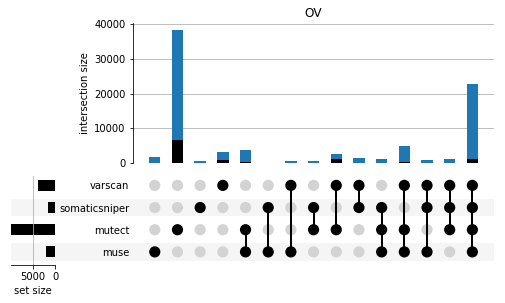

number of patients: 142
all: 73.52112676056338 372025.17913112475
mutect: 21.253521126760564 12423.907558024204
muse: 6.161971830985915 2852.6005256893473
somaticsniper: 0.33098591549295775 1.376363816703035
varscan: 1.5140845070422535 25.43290021821067
mutect+muse: 28.880281690140844 52675.387075976985
mutect+somaticsniper: 0.21830985915492956 1.1424816504661774
mutect+varscan: 3.5211267605633805 109.98194802618528
muse+somaticsniper: 0.528169014084507 21.96751636580044
muse+varscan: 8.19718309859155 8072.130132910138
somaticsniper+varscan: 0.4084507042253521 2.7204919658797864
mutect+muse+somaticsniper: 2.436619718309859 428.06288434834363
mutect+muse+varscan: 75.15492957746478 527848.9900813331
mutect+somaticsniper+varscan: 0.43661971830985913 9.696687165244992
muse+somaticsniper+varscan: 5.746478873239437 3538.696290418568


<Figure size 432x288 with 0 Axes>

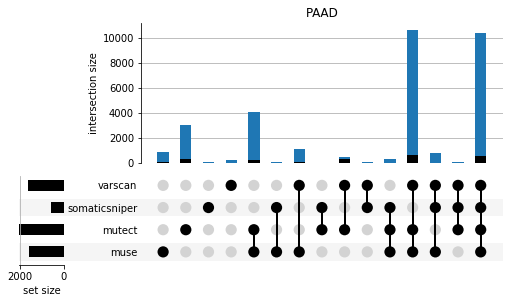

number of patients: 174
all: 6.890804597701149 26.028306249174268
mutect: 3.7528735632183907 6.255020478266616
muse: 0.3793103448275862 0.3963535473642489
somaticsniper: 0.19540229885057472 0.23768001056942792
varscan: 0.5574712643678161 0.476582111243229
mutect+muse: 0.6551724137931034 0.75465715418153
mutect+somaticsniper: 0.13793103448275862 0.16488307570352753
mutect+varscan: 1.0057471264367817 1.362035936054961
muse+somaticsniper: 0.011494252873563218 0.011362135024441796
muse+varscan: 0.13218390804597702 0.14919408112035937
somaticsniper+varscan: 0.08045977011494253 0.07398599550799312
mutect+muse+somaticsniper: 0.10344827586206896 0.09274673008323427
mutect+muse+varscan: 1.0 1.9310344827586208
mutect+somaticsniper+varscan: 0.19540229885057472 0.23768001056942792
muse+somaticsniper+varscan: 0.25862068965517243 0.2836900515259612


<Figure size 432x288 with 0 Axes>

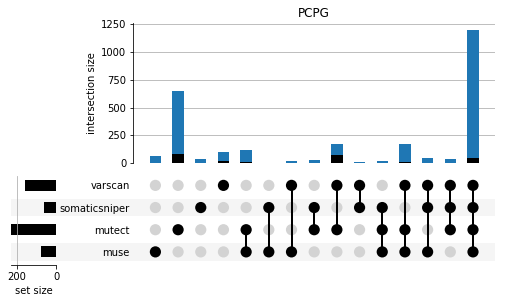

number of patients: 462
all: 35.634199134199136 109400.04151440189
mutect: 10.456709956709958 534.5987753228013
muse: 1.1688311688311688 51.35677742171248
somaticsniper: 0.27056277056277056 1.1497395101291212
varscan: 1.4415584415584415 38.29420363186596
mutect+muse: 3.2445887445887447 301.1890940949383
mutect+somaticsniper: 0.4069264069264069 13.072506137441202
mutect+varscan: 5.307359307359308 386.9877813384306
muse+somaticsniper: 0.1038961038961039 0.20132681171642214
muse+varscan: 0.6385281385281385 18.33037705440302
somaticsniper+varscan: 0.44805194805194803 14.026522179119587
mutect+muse+somaticsniper: 0.5411255411255411 16.495061936620374
mutect+muse+varscan: 5.46969696969697 347.82916830644103
mutect+somaticsniper+varscan: 1.6666666666666667 137.68542568542574
muse+somaticsniper+varscan: 2.036796536796537 851.438039954274


<Figure size 432x288 with 0 Axes>

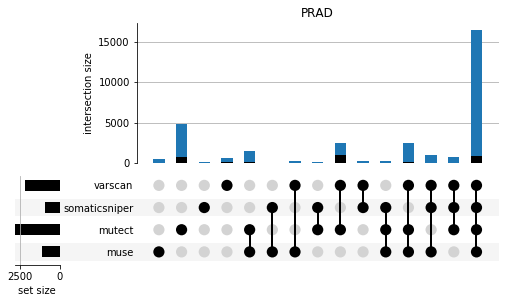

number of patients: 135
all: 302.7925925925926 1868848.5199451302
mutect: 61.17777777777778 23985.90913580247
muse: 10.718518518518518 3415.965212620027
somaticsniper: 1.7777777777777777 10.232098765432097
varscan: 17.933333333333334 3642.6844444444446
mutect+muse: 24.6 9008.565925925925
mutect+somaticsniper: 2.585185185185185 122.87978052126202
mutect+varscan: 28.97037037037037 9418.96208504801
muse+somaticsniper: 0.4666666666666667 5.167407407407407
muse+varscan: 6.42962962962963 1141.74134430727
somaticsniper+varscan: 4.711111111111111 188.5017283950617
mutect+muse+somaticsniper: 6.0 860.2222222222222
mutect+muse+varscan: 43.42962962962963 27175.133936899863
mutect+somaticsniper+varscan: 9.14074074074074 1397.972784636488
muse+somaticsniper+varscan: 26.17037037037037 24377.489492455417


<Figure size 432x288 with 0 Axes>

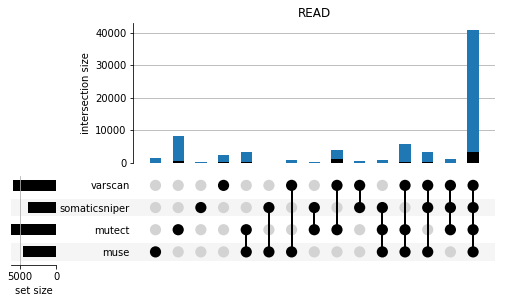

number of patients: 236
all: 70.40677966101696 45226.79215742602
mutect: 19.046610169491526 1089.0783359666761
muse: 2.330508474576271 16.509408216029883
somaticsniper: 1.4406779661016949 2.3312266590060324
varscan: 12.478813559322035 1374.4698901177826
mutect+muse: 5.38135593220339 140.09185578856656
mutect+somaticsniper: 1.555084745762712 16.280863975869007
mutect+varscan: 8.305084745762711 476.6018385521403
muse+somaticsniper: 0.2033898305084746 0.5857512209135308
muse+varscan: 1.5508474576271187 15.730465383510479
somaticsniper+varscan: 1.1101694915254237 5.801422005170927
mutect+muse+somaticsniper: 2.7754237288135593 169.36905702384368
mutect+muse+varscan: 9.542372881355933 625.0617638609593
mutect+somaticsniper+varscan: 2.26271186440678 31.041151967825336
muse+somaticsniper+varscan: 2.169491525423729 71.31025567365698


<Figure size 432x288 with 0 Axes>

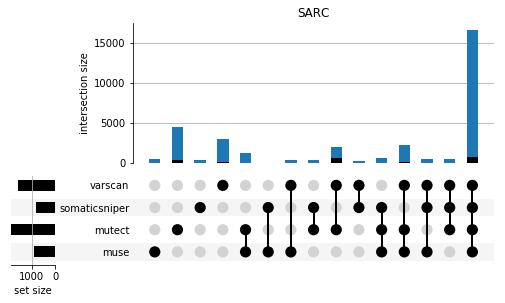

number of patients: 464
all: 587.7262931034483 1096107.6470672935
mutect: 56.97844827586207 18059.10298379905
muse: 15.368534482758621 4357.081854748811
somaticsniper: 2.8577586206896552 17.376319114149823
varscan: 24.20689655172414 1966.1985731272293
mutect+muse: 40.78448275862069 8119.345793697978
mutect+somaticsniper: 9.77801724137931 322.78046503418545
mutect+varscan: 36.03448275862069 6880.0936385255645
muse+somaticsniper: 1.7435344827586208 11.638966817776456
muse+varscan: 16.32112068965517 2549.7783470199165
somaticsniper+varscan: 7.674568965517241 219.71952567627827
mutect+muse+somaticsniper: 17.38146551724138 1032.5376737143283
mutect+muse+varscan: 78.22413793103448 29725.33338287753
mutect+somaticsniper+varscan: 19.079741379310345 1094.103555105529
muse+somaticsniper+varscan: 48.685344827586206 57348.84926798455


<Figure size 432x288 with 0 Axes>

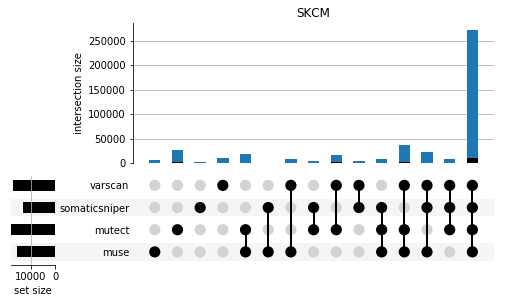

number of patients: 426
all: 248.27464788732394 308659.6076671296
mutect: 66.09624413145539 26768.509516409882
muse: 7.429577464788732 282.2685148449381
somaticsniper: 1.164319248826291 4.775816085873614
varscan: 20.14788732394366 1605.806767837069
mutect+muse: 27.706572769953052 4854.498407502921
mutect+somaticsniper: 1.823943661971831 14.511257686966873
mutect+varscan: 80.02582159624413 23879.532197094937
muse+somaticsniper: 0.4859154929577465 1.118346227600344
muse+varscan: 4.887323943661972 200.8229848575018
somaticsniper+varscan: 2.535211267605634 33.75110758447398
mutect+muse+somaticsniper: 2.791079812206573 42.5878077541934
mutect+muse+varscan: 62.943661971830984 18596.03438471203
mutect+somaticsniper+varscan: 10.187793427230046 336.7722453657784
muse+somaticsniper+varscan: 11.664319248826292 1721.3497597478452


<Figure size 432x288 with 0 Axes>

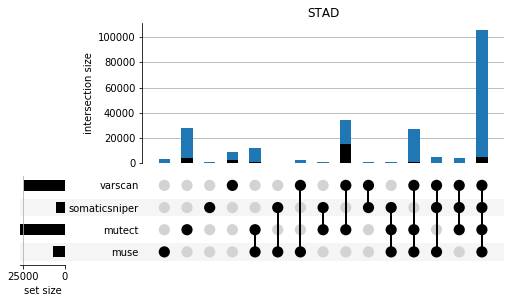

number of patients: 140
all: 10.521428571428572 60.93525510204081
mutect: 5.25 17.458928571428572
muse: 0.7 0.9528571428571427
somaticsniper: 0.32142857142857145 0.31811224489795925
varscan: 2.3285714285714287 2.8491836734693874
mutect+muse: 1.4357142857142857 2.288724489795918
mutect+somaticsniper: 0.07857142857142857 0.11525510204081633
mutect+varscan: 1.8142857142857143 3.094081632653062
muse+somaticsniper: 0.03571428571428571 0.03443877551020409
muse+varscan: 0.17142857142857143 0.18489795918367347
somaticsniper+varscan: 0.18571428571428572 0.2083673469387755
mutect+muse+somaticsniper: 0.09285714285714286 0.08423469387755103
mutect+muse+varscan: 2.9785714285714286 9.120969387755101
mutect+somaticsniper+varscan: 0.42857142857142855 0.573469387755102
muse+somaticsniper+varscan: 0.24285714285714285 0.2695918367346939


<Figure size 432x288 with 0 Axes>

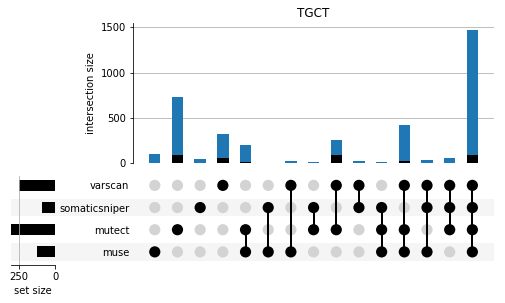

number of patients: 479
all: 7.624217118997913 42.10930914701383
mutect: 11.392484342379959 2729.8918850597756
muse: 0.3569937369519833 0.5969813590421938
somaticsniper: 0.13987473903966596 0.12448516176271894
varscan: 0.4759916492693111 0.5291730771745242
mutect+muse: 0.9311064718162839 2.406527168204462
mutect+somaticsniper: 0.05219206680584551 0.053643420312847315
mutect+varscan: 0.954070981210856 1.4049886463186612
muse+somaticsniper: 0.027139874739039668 0.030578667282656537
muse+varscan: 0.10020876826722339 0.10269306706299222
somaticsniper+varscan: 0.11064718162839249 0.1359826709262948
mutect+muse+somaticsniper: 0.07515657620041753 0.08203416128765131
mutect+muse+varscan: 1.1920668058455115 6.009039360881446
mutect+somaticsniper+varscan: 0.2630480167014614 0.39009592880086813
muse+somaticsniper+varscan: 0.2755741127348643 0.34577080818162403


<Figure size 432x288 with 0 Axes>

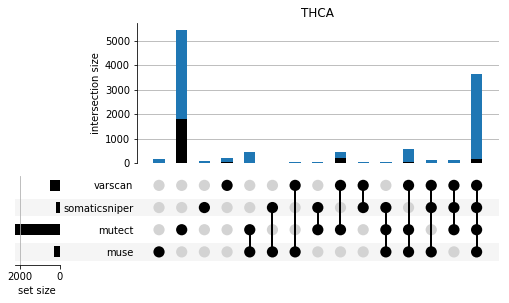

number of patients: 106
all: 17.745283018867923 4485.774741901032
mutect: 12.566037735849056 92.45318618725527
muse: 0.6792452830188679 1.0103239587041652
somaticsniper: 2.0754716981132075 2.9188323246707015
varscan: 7.273584905660377 370.48175507297964
mutect+muse: 2.292452830188679 14.414471342114627
mutect+somaticsniper: 0.4811320754716981 2.9288892844428625
mutect+varscan: 5.971698113207547 1691.6124065503739
muse+somaticsniper: 0.07547169811320754 0.12637949448202207
muse+varscan: 0.2169811320754717 0.45291918832324674
somaticsniper+varscan: 0.33962264150943394 1.1110715557137771
mutect+muse+somaticsniper: 0.5188679245283019 3.249644001423995
mutect+muse+varscan: 2.518867924528302 16.249644001423995
mutect+somaticsniper+varscan: 0.9811320754716981 12.150587397650407
muse+somaticsniper+varscan: 0.32075471698113206 1.65183339266643


<Figure size 432x288 with 0 Axes>

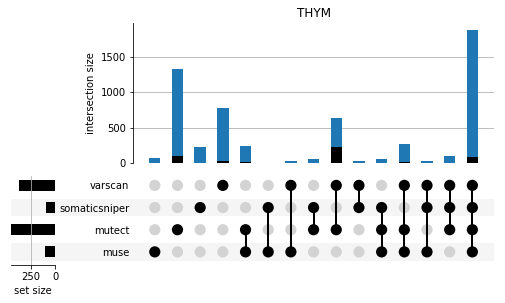

number of patients: 529
all: 1146.4120982986767 9731051.142084256
mutect: 156.52362948960302 121592.6312941992
muse: 43.42722117202268 27021.48099813823
somaticsniper: 4.449905482041588 120.72008033133105
varscan: 68.75047258979205 15484.391422271934
mutect+muse: 88.37807183364839 56143.42227907991
mutect+somaticsniper: 5.705103969754253 220.10963368484246
mutect+varscan: 130.6880907372401 67521.7004441808
muse+somaticsniper: 1.5954631379962192 22.513098509510755
muse+varscan: 19.650283553875237 12763.618719201262
somaticsniper+varscan: 15.017013232514177 2137.9222058240216
mutect+muse+somaticsniper: 7.3081285444234405 426.4816163464252
mutect+muse+varscan: 105.95652173913044 209661.32703213612
mutect+somaticsniper+varscan: 34.59735349716446 10001.280219839122
muse+somaticsniper+varscan: 119.28166351606805 206940.2325749265


<Figure size 432x288 with 0 Axes>

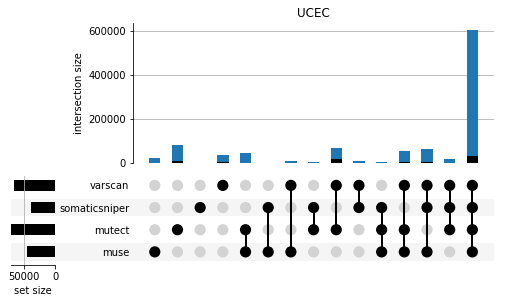

number of patients: 57
all: 126.66666666666667 293066.53801169596
mutect: 15.543859649122806 1326.0024622960914
muse: 2.508771929824561 65.65343182517697
somaticsniper: 0.5087719298245614 0.5657125269313635
varscan: 5.105263157894737 61.91874422899354
mutect+muse: 9.947368421052632 1223.9796860572485
mutect+somaticsniper: 1.719298245614035 2.5878731917513083
mutect+varscan: 11.210526315789474 1070.236380424746
muse+somaticsniper: 0.08771929824561403 0.08002462296091105
muse+varscan: 1.8421052631578947 6.308402585410896
somaticsniper+varscan: 1.7017543859649122 8.630347799322868
mutect+muse+somaticsniper: 2.9298245614035086 18.065250846414287
mutect+muse+varscan: 13.052631578947368 1454.9621421975996
mutect+somaticsniper+varscan: 2.245614035087719 51.97476146506617
muse+somaticsniper+varscan: 5.614035087719298 475.99138196368114


<Figure size 432x288 with 0 Axes>

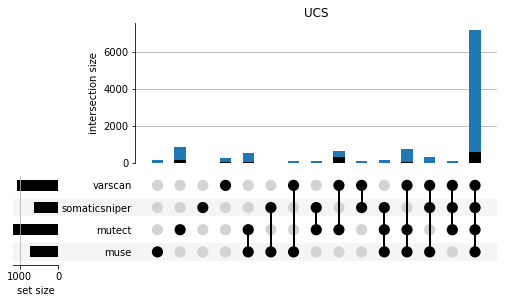

number of patients: 80
all: 14.6 1393.2400000000002
mutect: 4.1625 55.411093750000006
muse: 0.825 2.319375
somaticsniper: 0.2625 0.29359375000000004
varscan: 0.8125 1.32734375
mutect+muse: 0.7875 1.7173437500000002
mutect+somaticsniper: 0.4125 1.2673437500000002
mutect+varscan: 1.3875 23.73734375
muse+somaticsniper: 0.05 0.047499999999999994
muse+varscan: 0.4125 0.7173437500000001
somaticsniper+varscan: 0.2 0.41
mutect+muse+somaticsniper: 0.225 0.42437500000000006
mutect+muse+varscan: 0.825 4.144375000000001
mutect+somaticsniper+varscan: 0.8 21.760000000000005
muse+somaticsniper+varscan: 0.8125 2.87734375


<Figure size 432x288 with 0 Axes>

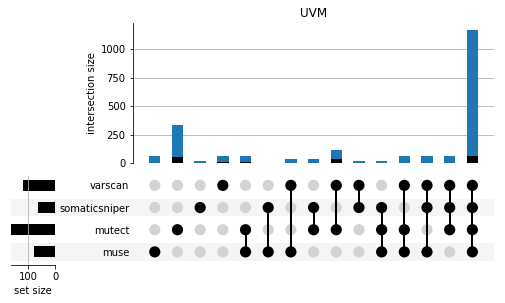

In [8]:
## os.chdir(original)
possible_cancers = ('OV','PAAD','PCPG','PRAD','READ','SARC','SKCM','STAD','TGCT','THCA','THYM','UCEC','UCS','UVM')
for cancer in possible_cancers:
    os.chdir(original)
    os.chdir(cancer)
    mafs = os.listdir()

    maf_fps = {}
    for caller in possible_callers:
        for maf in mafs:
            if caller in maf: # str in the filepath
                maf_fps[caller] = maf

    #print(possible_callers)
    #print(maf_fps)

    # parse maf for each caller
    all_variants = {}
    for caller in maf_fps:
        all_variants[caller] = parse_maf(maf_fps[caller])
        
    num_callers = len(possible_callers)
    dat = []
    
    """
    #two ways
    
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            set_vals = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
            dat.append(set_vals)
            print(possible_callers[i], possible_callers[j])
            print(set_vals)
    """
    """
    # three ways 
    for i in range(0, num_callers):
        if i == num_callers:
            break
        for j in range(i + 1, num_callers):
            for k in range(j+1, num_callers):
                set_vals = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
                dat.append(set_vals)
                print(possible_callers[i], possible_callers[j], possible_callers[k])
                print(set_vals)
    
    
    print(four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]]))
    """
    
   # four way intersection    
    dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
    #print(possible_callers[0], possible_callers[1], possible_callers[2], possible_callers[3])
    #print(set_vals)
   
    example = from_memberships([['muse'],['mutect'],['somaticsniper'], ['varscan'],
                              ['muse','mutect'], ['muse','somaticsniper'], ['muse','varscan'],
                              ['mutect','somaticsniper'], ['mutect','varscan'], ['somaticsniper','varscan'],
                              ['muse','mutect','somaticsniper'], ['muse','mutect','varscan'], 
                              ['muse','somaticsniper','varscan'], ['mutect','somaticsniper','varscan'], 
                              ['muse','mutect','somaticsniper','varscan']], data=how_many_high(cancer, all_variants) )
    
    #print(example)
    pyplot.figure()
    ax = plot(example, orientation='horizontal', sort_by='degree', sort_sets_by=None)
    # need to extract number of high impact total - number of high impact, write a function to count number of high impact
    ax['intersections'].bar([0,1,2,3,4,5,6,7,8,9,10,11,12,13,14], dat, width=0.5,zorder=3)
    pyplot.title(cancer)
    pyplot.ylabel('intersection size')
    ax['totals'].set_xlabel('set size')
    pyplot.show()
    
    

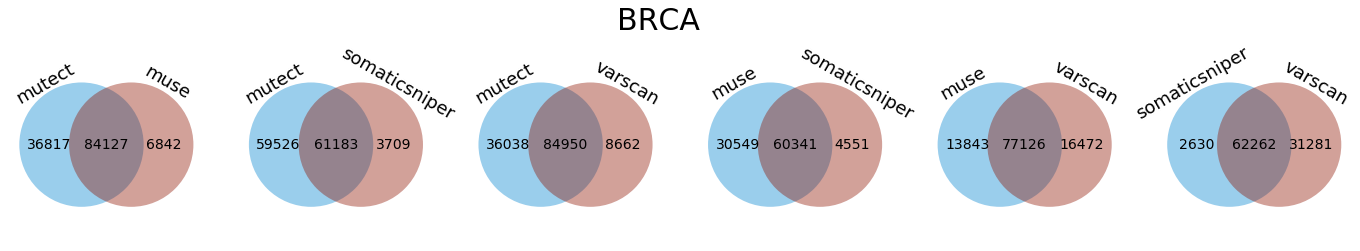

<Figure size 432x288 with 0 Axes>

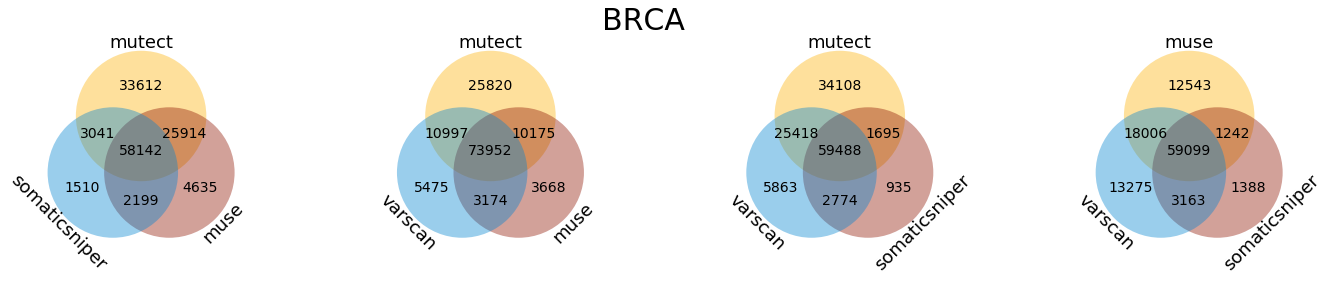

number of patients: 975
all: 58.550769230769234 31956.507935305726
mutect: 25.68 3482.2565743589744
muse: 3.562051282051282 101.8482009204471
somaticsniper: 0.7671794871794871 1.4832305062458908
varscan: 4.821538461538461 153.63174122287964
mutect+muse: 9.302564102564103 940.6089677843522
mutect+somaticsniper: 0.6564102564102564 1.948612754766601
mutect+varscan: 8.793846153846154 635.2795518737672
muse+somaticsniper: 0.19179487179487179 0.3396249835634451
muse+varscan: 1.1917948717948719 73.42680447074292
somaticsniper+varscan: 0.7815384615384615 3.4794540433925047
mutect+muse+somaticsniper: 1.082051282051282 6.143011176857331
mutect+muse+varscan: 17.275897435897434 8452.622342143326
mutect+somaticsniper+varscan: 2.4625641025641025 42.57680368178829
muse+somaticsniper+varscan: 2.0635897435897435 141.93236660092046
[3473, 25038, 748, 4701, 9070, 187, 1162, 640, 8574, 762, 1055, 16844, 2012, 2401, 57087]


<Figure size 432x288 with 0 Axes>

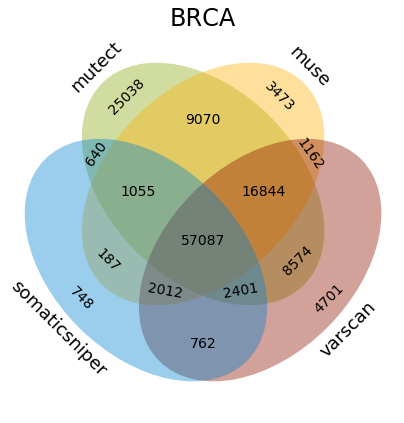

In [7]:
import matplotlib.pyplot as plt
from itertools import combinations
from simple_venn import venn2, venn3, venn4

# BRCA Venn diagrams
os.chdir(original)
os.chdir('BRCA')
mafs = os.listdir()

maf_fps = {}
for caller in possible_callers:
    for maf in mafs:
        if caller in maf: # str in the filepath
            maf_fps[caller] = maf

# parse maf for each caller
all_variants = {}
for caller in maf_fps:
    all_variants[caller] = parse_maf(maf_fps[caller])
        
num_callers = len(possible_callers)
fig, axes = plt.subplots(1, 6, figsize=(24, 4))
#two ways
sub = 0
for i in range(0, num_callers):
    if i == num_callers:
        break
    for j in range(i + 1, num_callers):
        dat = two_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]])
        data = []
        data.extend([dat[1], dat[2], dat[0]])
        sets = (possible_callers[i], possible_callers[j])
        subsets = data
        ax = axes[sub]
        venn2(subsets, sets, ax=ax)
        ax.set_title('', fontsize=24)
        sub = sub+1

fig.suptitle('BRCA', fontsize=30)  
plt.show()
plt.clf()

fig, axes = plt.subplots(1, 4, figsize=(24, 4))
# three ways 
sub = 0
for i in range(0, num_callers):
    if i == num_callers:
        break
    for j in range(i + 1, num_callers):
        for k in range(j+1, num_callers):
            dat = three_set(all_variants[possible_callers[i]], all_variants[possible_callers[j]],all_variants[possible_callers[k]])
            data = []
            data.extend([dat[1], dat[2], dat[3], dat[4],dat[5],dat[6],dat[0]])
            sets = (possible_callers[i], possible_callers[j],possible_callers[k])
            subsets = data
            ax = axes[sub]
            venn3(subsets, sets, ax=ax)
            ax.set_title('', fontsize=24)
            sub = sub+1

fig.suptitle('BRCA', fontsize=30)
plt.show()
plt.clf()
import numpy as np
fig, axes = plt.subplots(1, 1, figsize=(7, 7))

# four way intersection    
dat = four_set(all_variants[possible_callers[0]], all_variants[possible_callers[1]],
                        all_variants[possible_callers[2]], all_variants[possible_callers[3]])
print(dat)
data = []
data.extend([dat[1],dat[0],dat[2],dat[3],dat[4],dat[7],dat[8],dat[5],dat[6],dat[9],dat[10],dat[11],dat[13],dat[12],dat[14]])
sets = (possible_callers[0], possible_callers[1],possible_callers[2], possible_callers[3])
subsets = data
ax = axes
venn4(subsets, sets)
plt.title('BRCA', fontsize=24)
plt.show()
